# The LEGO dataset - aggregation and merging of data with pandas

On day 73 of "[100 Days of Code: The Complete Python Pro Bootcamp for 2023](https://www.udemy.com/course/100-days-of-code/)" we looked at a dataset about LEGO and the history of the company's product offering. The csv files used here, were provided in the course lesson. The data was obtained from [Rebrickable's database](https://rebrickable.com/downloads/) in late 2020 (i.e., 2019 is the last year with complete data).

<br>
From the assignment description:

<p class="tab"><em> 
    Today we'll dive deep into a dataset all about LEGO. From the dataset we can ask whole bunch of interesting questions about the history of the LEGO company, their product offering, and which LEGO set ultimately rules them all:</p></em>

<ul>
    <em>
        <li>What is the most enormous LEGO set ever created and how many parts did it have?</li>
        <li>How did the LEGO company start out? In which year were the first LEGO sets released and how many different sets did the company offer when it first launched?</li>
        <li>Which LEGO theme has the most sets? Is it one of LEGO's own themes like Ninjago or a theme they licensed liked Harry Potter or Marvel Superheroes?</li>
        <li>When did the LEGO company really expand its product offering? Can we spot a change in the company strategy based on how many themes and sets did it released year-on-year?</li>
        <li>Did LEGO sets grow in size and complexity over time? Do older LEGO 
sets tend to have more or fewer parts than newer sets?</li>
    </em>
</ul>

<img src="https://i.imgur.com/49FNOHj.jpg" width=900 alt="Photo of lego pieces.">

[Image source](https://i.imgur.com/49FNOHj.jpg)

# Import Statements

In [1]:
import os
import json
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

<br>



In [2]:
# **Report and JSON pretty printer**

import json
import os

def pp(json_object):
    """Pretty print a json_object (like a dict, a list of dicts or dict of dicts)."""
    # json.dumps() takes a json_object and returns a string.
    # To make this function print Norwegian letters (æ, ø and å): add 
    # "ensure_ascii=False", ".encode('UTF-8')" and ".decode()".
    json_string = json.dumps(json_object, indent=4, ensure_ascii=False).encode('UTF-8')
    print(json_string.decode())

# Report dictionary (norwegian "rapport"): a tool for keeping track of dataframes, terms/abbrevations used and results.
datafiler = [file for file in os.listdir('data') if not file.startswith('.')]

rapport = {
    'oversikt': {
        'filer': {
            'data': datafiler,
        }
    },
    'dfs': {
    },
    'ord og forkortelser': {
        'df': ' pandas DataFrame',
        'dfs': 'dataframes, flertall av pandas DataFrame',
    }
}

pp(rapport)

{
    "oversikt": {
        "filer": {
            "data": [
                "colors.csv",
                "sets.csv",
                "themes.csv"
            ]
        }
    },
    "dfs": {},
    "ord og forkortelser": {
        "df": " pandas DataFrame",
        "dfs": "dataframes, flertall av pandas DataFrame"
    }
}


# Data Exploration

In [3]:
colors_df = pd.read_csv('data/colors.csv')
colors_df

,id,name,rgb,is_trans
0,-1,Unknown,0033B2,f
1,0,Black,05131D,f
2,1,Blue,0055BF,f
3,2,Green,237841,f
4,3,Dark Turquoise,008F9B,f
...,...,...,...,...
130,1004,Trans Flame Yellowish Orange,FCB76D,t
131,1005,Trans Fire Yellow,FBE890,t
132,1006,Trans Light Royal Blue,B4D4F7,t
133,1007,Reddish Lilac,8E5597,f


In [4]:
rapport['dfs']['0 colors_df'] = [
    f'Kolonner: {colors_df.columns.to_list()}',
    'Fra data/colors.csv.',
    f'{colors_df.shape[0]} rader, {colors_df.shape[1]} kolonner.',
    'Ingen endringer.']
pp(rapport['dfs'])

{
    "0 colors_df": [
        "Kolonner: ['id', 'name', 'rgb', 'is_trans']",
        "Fra data/colors.csv.",
        "135 rader, 4 kolonner.",
        "Ingen endringer."
    ]
}


---

**Challenge**: How many different colours does the LEGO company produce? Read the colors.csv file in the data folder and find the total number of unique colours. Try using the [.nunique() method](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.nunique.html?highlight=nunique#pandas.DataFrame.nunique) to accomplish this.

**Beskrivelse av colors_df"**
- 4 kolonner: `id`, `name`, `rgb`, `is_trance`.
- count: Det er 135 rader i hver kolonne.
- unique: Det er 135 unike `name`-verdier, og 124 unike `rgb`-verdier.
  Spørsmålet om hvor mange ulike _farger_ som finnes, kan derfor tolkes på minst to ulike måter:
  
    1. **Smal definisjon**: En kan si at RGB-verien er _selve fargen_, og at det derfor er 124 ulike farger. I tillegg finnes det andre 
       egenskaper/faktorer (f.eks. gjennomsiktighet) som gjør at legobiter med samme farge (RGB-verdi) har ulikt utseende.
       
    2. **Bred definisjon:** Eller man kan definere _farge_ som de egenskapene ved en legobit som ikke er relatert til form, altså RGB-verdi, 
       gjennomsiktighet, matthet, med flere. Om _tekstur_ i så fall skal klassifiseres som _form_ eller _farge_, er et spørsmål jeg 
       ikke vil diskutere her.
       
  - I bricklink sin [Color Guide](https://www.bricklink.com/catalogColors.asp) skilles det mellom blant annet 
    "Solid Colors", "Transparent Colors" og "Metallic Colors", og jeg vil derfor bruke den brede definisjonen her.
    Det vil si at jeg anser hvert unike navn i color_df som en unik farge.

- I kolonnen `is_trans` angis det om fargen er transparent ('t' for true) eller ikke ('f' for false).

In [5]:
print(colors_df.describe(include='all'), end='\n\n')

                 id     name     rgb is_trans
count    135.000000      135     135      135
unique          NaN      135     124        2
top             NaN  Unknown  FFFFFF        f
freq            NaN        1       3      107
mean     253.037037      NaN     NaN      NaN
std      878.441466      NaN     NaN      NaN
min       -1.000000      NaN     NaN      NaN
25%       34.500000      NaN     NaN      NaN
50%       85.000000      NaN     NaN      NaN
75%      231.000000      NaN     NaN      NaN
max     9999.000000      NaN     NaN      NaN



In [6]:
print('Numer of unique names: ', len(colors_df.name.unique()), end='\n\n') # unique_names
print(colors_df.nunique(axis='index', dropna=False)) # With this method, it is possible to ignore NaN values.
n_unique_colors = colors_df['name'].nunique()
n_unique_colors

Numer of unique names:  135

id          135
name        135
rgb         124
is_trans      2
dtype: int64


135

<p style="color: magenta;">LEGO produserer legobrikker med 135 ulike farger.

In [7]:
rapport['Resultater'] = {'Antall lego-farger': "LEGO produserer lego med 135 ulike farger (var: n_unique_colors). \
En LEGO-farge er ikke bare karakterisert ved sin RGB-verdi; LEGO-farger med lik RGB-verdi, har ulike navn dersom \
de er forskjellige med hensyn på andre faktorer som gjennomsiktighet, matthet/glans, glitter-innhold, med fler."}

<br><br>

---

**Challenge**: Find the number of transparent colours where <code>is_trans == 't'</code> versus the number of opaque colours where <code>is_trans == 'f'</code>. See if you can accomplish this in two different ways.

<p style="color: magenta;"> Av de 135 LEGO-fargene er 28 transparente. De resterende 107 er ugjennomsiktige (engelsk: opaque).

In [8]:
# Get number of 't' in is_trans:
n_trans_1 = len(colors_df[colors_df.is_trans == 't'])     # len()
n_trans_2 = colors_df[colors_df.is_trans == 't'].shape[0]   # .shape[0] = number of rows
n_trans_3 = (colors_df['is_trans'] == 't').sum()    # sum()
print(n_trans_1, n_trans_2, n_trans_3, end='\n\n')

# Count number of 'f' in is_trans:
n_not_trans = len(colors_df[colors_df.is_trans == 'f'])
print(n_not_trans)

28 28 28

107


In [9]:
# Get number og 't' and 'f' in is_trans with groupby().count()
trans_counts = colors_df.groupby(by='is_trans').count()
trans_counts

,id,name,rgb
is_trans,,,
f,107,107,107
t,28,28,28


In [10]:
# Get number of each value in is_trans:
trans_counts_s = colors_df['is_trans'].value_counts(dropna=False) # --> Series
trans_counts_s

f    107
t     28
Name: is_trans, dtype: int64

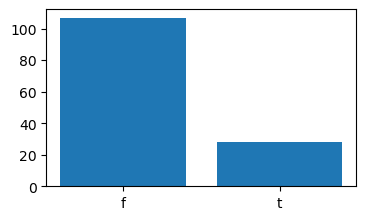

In [11]:
x = trans_counts_s.index.to_list()
y = trans_counts_s.to_list()

fig, ax = plt.subplots(figsize=(4, 2.3))
ax.bar(x, y)

plt.show()

In [12]:
rapport['Series'] = {
    'trans_counts_s': "Antall transparente og ikke-transparente LEGO-farger \
    (angitt med t=true, f=false i kolonnen is_trans i colors_df). \
    Antall 't' = 28 = antall LEGO-farger som er gjennomsiktig. \
    Antall 'f' = 107 = antall ikke-gjennomsiktige LEGO-farger."}

rapport['Resultater']['Antall transparente farger'] = "Av 135 LEGO-fargene er \
28 transparente. De resterende 107 er ugjennomsiktige (engelsk: opaque)."

---
<h3 style="color: green;">Understanding LEGO Themes vs. LEGO Sets</h3>

<font size="3">LEGO's products are organised by **theme**. Star Wars, Batman, Harry Potter are just a few examples.</font>

<img src="https://i.imgur.com/aKcwkSx.png" width=900>

<font size="2">[Image source](https://i.imgur.com/aKcwkSx.png)</font>


<font size="3">A lego **set** is a particular box of LEGO or product. Therefore, a single theme typically has many different sets.</font>

<img src="https://i.imgur.com/whB1olq.png" width=900>

<font size="2">[Image source](https://i.imgur.com/whB1olq.png)</font>

In [13]:
rapport['ord og forkortelser']['theme'] = "LEGO sine produkter organiseres etter tema, f.eks. Batman og Harry Potter. \
Innenfor hver tema, finnes det ofte mange ulike sett."
rapport['ord og forkortelser']['set'] = "Et legosett er en spesifikk boks med LEGO."

---
<code>sets.csv</code> inneholder en liste over LEGO-sett.
- `set_num` sett-nummeret - en unik ID for hvert sett.
- `name` settets navn. 
- `year` hvilket år settet ble utgitt. 
- `theme_id`: hvilket tema settet hører til, angitt ved theme_id som refererer til key-id i themes.csv.
- `num_parts`: antall deler i settet.

**Challenge**: Read the sets.csv data and take a look at the first and last couple of rows. 

In [14]:
sets_df = pd.read_csv('data/sets.csv')
sets_df

,set_num,name,year,theme_id,num_parts
0,001-1,Gears,1965,1,43
1,0011-2,Town Mini-Figures,1978,84,12
2,0011-3,Castle 2 for 1 Bonus Offer,1987,199,0
3,0012-1,Space Mini-Figures,1979,143,12
4,0013-1,Space Mini-Figures,1979,143,12
...,...,...,...,...,...
15705,wwgp1-1,Wild West Limited Edition Gift Pack,1996,476,0
15706,XMASTREE-1,Christmas Tree,2019,410,26
15707,XWING-1,Mini X-Wing Fighter,2019,158,60
15708,XWING-2,X-Wing Trench Run,2019,158,52


In [15]:
rapport['dfs']['1 sets_df'] = [
    f"Kolonner: {sets_df.columns.to_list()}",
    "Fra 'data/sets.csv'.",
    "15710 rader, 5 kolonner.",
    "Ingen endringer"
]

In [16]:
sets_df.dtypes

set_num      object
name         object
year          int64
theme_id      int64
num_parts     int64
dtype: object


<br>

**Challenge**: In which year were the first LEGO sets released and what were these sets called?

<p style="color: magenta;">De første legosettene ble utgitt i 1949. De ble kalt:
'Extra-Large Gift Set (ABB)', 'Large Gift Set (ABB)', 'Medium Gift Set (ABB)',<br>'Small Brick Set (ABB)', 'Small Doors and Windows Set (ABB)'</p>

In [17]:
year_of_first_set = sets_df.year.min() # 1949
print('year of first set: ', year_of_first_set)

set_names_1949 = sets_df[sets_df.year == 1949].name
[name for name in set_names_1949]

year of first set:  1949


['Extra-Large Gift Set (ABB)',
 'Large Gift Set (ABB)',
 'Medium Gift Set (ABB)',
 'Small Brick Set (ABB)',
 'Small Doors and Windows Set (ABB)']

In [18]:
sets_year = sets_df.sort_values(by='year')
sets_year.head(6)

,set_num,name,year,theme_id,num_parts
9521,700.1-1,Extra-Large Gift Set (ABB),1949,365,142
9534,700.2-1,Large Gift Set (ABB),1949,365,178
9539,700.3-1,Medium Gift Set (ABB),1949,365,142
9544,700.A-1,Small Brick Set (ABB),1949,371,24
9545,700.B-1,Small Doors and Windows Set (ABB),1949,371,12
9526,700.1.2-1,Single 2 x 2 Brick (ABB),1950,371,1


<br><br>**Challenge**: How many different sets did LEGO sell in their first year? How many types of LEGO products were on offer in the year the company started?

<p style="color: magenta;">
LEGO hadde bare 5 ulike sett på markedet det første året, og de var fordelt på 2 uilke temaer (theme_id 365 og 371).
</p>

In [19]:
# Sets released in 1949
sets_1949_df = sets_df[sets_df.year == 1949]
sets_1949_df

,set_num,name,year,theme_id,num_parts
9521,700.1-1,Extra-Large Gift Set (ABB),1949,365,142
9534,700.2-1,Large Gift Set (ABB),1949,365,178
9539,700.3-1,Medium Gift Set (ABB),1949,365,142
9544,700.A-1,Small Brick Set (ABB),1949,371,24
9545,700.B-1,Small Doors and Windows Set (ABB),1949,371,12


In [20]:
# Number of sets released in 1949
print('num_sets_1949_df: ', len(sets_1949_df), end='\n\n')

print('number of different themes among the 1949-sets: ', sets_1949_df.theme_id.nunique(), end='\n\n')

num_sets_1949_df:  5

number of different themes among the 1949-sets:  2



In [21]:
rapport['dfs']['2 sets_1949_df'] = ["Fra sets_df. Kun rader der 'year'==1949.", "Kode: sets_df[sets_df.year == 1949]", "5 rader, 5 kolonner."]

rapport['Resultater']['De første LEGO-settene'] = [
                      "Det første legosettet ble utgitt i 1949. Det var 5 ulike sett, fordelt på to temaer (theme_id 365 og 371).",
                      f"Navn på settene: {set_names_1949.to_list()}",]

<br><br>

**Challenge**: Find the top 5 LEGO sets with the most number of parts.

<p style="color: magenta;">De 5 legosettene med flest deler er 'The Ultimate Battle for Chima', 'UCS Millennium Falcon', 'Hogwarts Castle', 'Taj Mahal' fra 1017 og 'Taj Mahal' fra 2008.</p>

In [22]:
top_parts = sets_df.sort_values(by='num_parts', ascending=False).head(6) # Most parts - top 6 sets (to see if number 5 and 6 has same num_parts).
print(top_parts, end="\n\n")

print(top_parts.name[:5].tolist()) # Names of top 5.

        set_num                           name  year  theme_id  num_parts
15004  BIGBOX-1  The Ultimate Battle for Chima  2015       571       9987
11183   75192-1          UCS Millennium Falcon  2017       171       7541
10551   71043-1                Hogwarts Castle  2018       246       6020
295     10256-1                      Taj Mahal  2017       673       5923
221     10189-1                      Taj Mahal  2008       673       5922
11471   75978-1                   Diagon Alley  2020       246       5547

['The Ultimate Battle for Chima', 'UCS Millennium Falcon', 'Hogwarts Castle', 'Taj Mahal', 'Taj Mahal']


In [23]:
rapport['Resultater']['Sett med flest deler'] = f"De fem settene med flest deler: {top_parts.name[:5].tolist()}. \
De to settene med navn 'Taj Mahal' er fra 2017 og 2008, der førstnevnte har en bit mer enn sistnevnte."

<br><br>
## Number of sets published over time

**Challenge**: Use <code>.groupby()</code> and <code>.count()</code> to show the number of LEGO sets released year-on-year. How do the number of sets released in 1955 compare to the number of sets released in 2019? 

<p style="color: magenta;">Antall sett utgitt er mange ganger høyere i 2019 (med 840 sett) enn i 1955 da det bare ble utgitt 28 sett.</p>

**Challenge**: Show the number of LEGO releases on a line chart using Matplotlib. <br>
Note that the .csv file is from late 2020, so to plot the full calendar years, you will have to exclude some data from your chart.

In [24]:
sets_per_year = sets_df.groupby(by='year').count()['set_num']
# An equivalent: sets_per_year = sets_df.groupby(by='year').size()
sets_per_year.head(5)

year
1949     5
1950     6
1953     4
1954    14
1955    28
Name: set_num, dtype: int64

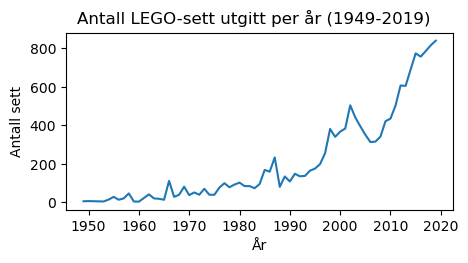

In [25]:
# Date
years = sets_per_year.index[:-2]
sets = sets_per_year.values[:-2]

# Figure
fig, ax = plt.subplots(figsize=(5, 2.3))
fig.suptitle('Antall LEGO-sett utgitt per år (1949-2019)')
ax.plot(years, sets)
ax.set_xlabel('År')
ax.set_ylabel('Antall sett')
plt.show()

<br>

## Aggregate Data with the Python .agg() Function

### Number of Themes per Calendar Year

Let's work out the number of different themes shipped by year. This means we have to count the number of unique theme_ids per calendar year.

In [26]:
# Number of unique theme_ids per calendar year
#themes_by_year = sets_df.groupby(by='year').agg({'theme_id': 'nunique'})
themes_per_year = sets_df.groupby(by='year').agg({'theme_id': pd.Series.nunique})
themes_per_year.rename(columns={'theme_id': 'themes'}, inplace=True) # Rename column

# This produces the same results as above. Number of unique theme_ids per calendar year, with .NamedAgg()
themes_per_year = sets_df.groupby(by='year').agg(themes=pd.NamedAgg(column='theme_id', aggfunc='nunique'))

themes_per_year

,themes
year,
1949,2
1950,1
1953,2
1954,2
1955,4
...,...
2017,89
2018,93
2019,78


<br>

**Challenge**: Plot the number of themes released by year on a line chart. Only include the full calendar years (i.e., exclude 2020 and 2021). 

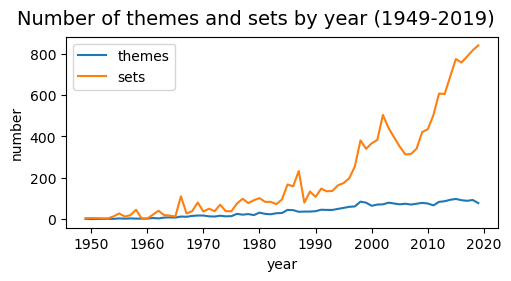

In [27]:
years = themes_per_year.index[:-2]
num_themes = themes_per_year.themes[:-2]
num_sets = sets_per_year.values[:-2]

fig, ax = plt.subplots(figsize=(5, 2.7), layout='constrained')
fig.suptitle('Number of themes and sets by year (1949-2019)', fontsize=14)
ax1 = ax.plot(years, num_themes, label='themes')
ax2 = ax.plot(years, num_sets, label='sets')

ax.set_xlabel('year')
ax.set_ylabel('number')
ax.legend()

<br>

### Line Charts with Two Axes with differend y-scales.
In the linechart with the number of themes and sets by year - number of themes ranges from 0 to 90, and number of sets ranges from 0 to 900.
Plot the two lines on the same chart, with differend y-scale.

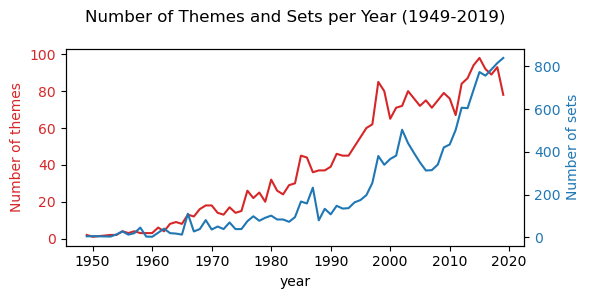

In [28]:
# Data
years = themes_per_year.index[:-2]
num_themes = themes_per_year.themes[:-2]
num_sets = sets_per_year.values[:-2]

# Figure
# ax1, num_themes
fig, ax1 = plt.subplots(figsize=(6, 3))
fig.suptitle('Number of Themes and Sets per Year (1949-2019)')

color = 'tab:red'
ax1.set_xlabel('year')
ax1.set_ylabel('Number of themes', color=color)
ax1.plot(years, num_themes, label='themes', color=color)
ax1.tick_params(axis='y', labelcolor=color)

# ax2, num_sets
ax2 = ax1.twinx() # Instantiate a second axes that share x-axis with ax1.

color = 'tab:blue'
ax2.set_ylabel('Number of sets', color=color)
ax2.plot(years, num_sets, label='sets', color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.show()

<br><br>

**Challenge**: Use the <code>.groupby()</code> and <code>.agg()</code> function together to figure out the average number of parts per set. How many parts did the average LEGO set released in 1954 compared to say, 2017?

In [29]:
pd.set_option('display.precision', 0)

# Average number of parts per sett, per year.
annual_avg_parts_per_set = sets_df.groupby(by='year').agg(avg_parts=pd.NamedAgg(column='num_parts', aggfunc=pd.Series.mean))
annual_avg_parts_per_set

,avg_parts
year,
1949,100
1950,1
1953,14
1954,12
1955,37
...,...
2017,222
2018,214
2019,208


In [30]:
rapport['dfs']['3 annual_avg_parts_per_set'] = [
    "Fra: sets_df.",
    "Kode: sets_df.groupby(by='year').agg(avg_parts=pd.NamedAgg(column='num_parts', aggfunc=pd.Series.mean))",
    "Kolonner: ['avg_parts']",
    "index='year' med år fra 1949-2021, men tallene for 2020-2021 er ufullstendige."]

### Scatter Plots in Matplotlib

**Challenge**: Has the size and complexity of LEGO sets increased over time based on the number of parts? Plot the average number of parts over time using a Matplotlib scatter plot. See if you can use the [scatter plot documentation](https://matplotlib.org/3.1.0/api/_as_gen/matplotlib.pyplot.scatter.html) before I show you the solution. Do you spot a trend in the chart? 

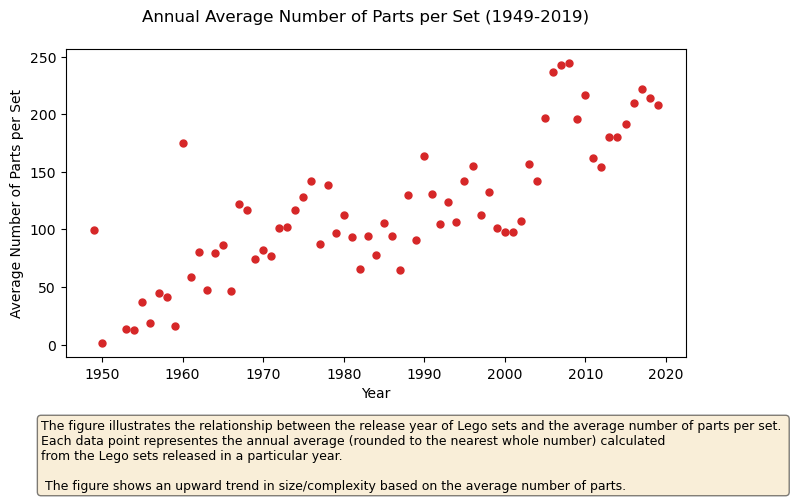

In [31]:
# Data
years = annual_avg_parts_per_set.index[:-2]
avg_num_parts = annual_avg_parts_per_set[:-2]
fig_text = "The figure illustrates the relationship between the release year of Lego sets and the average number of parts per set. \n\
Each data point representes the annual average (rounded to the nearest whole number) calculated \n\
from the Lego sets released in a particular year.\n\n The figure shows an upward trend in size/complexity \
based on the average number of parts."


# Figure
fig, ax = plt.subplots(figsize=(8, 4))

fig.suptitle('Annual Average Number of Parts per Set (1949-2019)')
ax.set_ylabel('Average Number of Parts per Set')
ax.set_xlabel('Year')
ax.plot(avg_num_parts, color='C3', marker='o', markersize=5, linewidth=0)

props=dict(boxstyle='round', facecolor='wheat', alpha=0.5)
ax.text(-0.04, -0.2, fig_text, transform=ax.transAxes, fontsize=9, verticalalignment='top', bbox=props)

plt.show()

<br>

### Number of Sets per LEGO Theme

LEGO has licensed many hit franchises from Harry Potter to Marvel Super Heros to many others. But which theme has the largest number of individual sets? 

**Challenge** Use what you know about HTML markup and tags to display the database schema: https://i.imgur.com/Sg4lcjx.png

<img src="https://i.imgur.com/Sg4lcjx.png" width=900>

In [32]:
# Two ways to get the number of sets per theme.
num_sets_per_theme = sets_df.groupby(by='theme_id').agg(num_sets=pd.NamedAgg(column='theme_id', aggfunc='count'))
print(num_sets_per_theme.max())
print(num_sets_per_theme.idxmax())

num_sets_per_theme2 = sets_df['theme_id'].value_counts().rename_axis('theme_id').to_frame('num_sets')
num_sets_per_theme2 # This df is sorted by num_sets (descending).

num_sets    753
dtype: int64
num_sets    158
dtype: int64


,num_sets
theme_id,
158,753
501,656
494,398
435,356
503,329
...,...
307,1
215,1
361,1


In [33]:
# The theme with theme_id '158' has the largest number of sets. Which theme is it?
themes_df = pd.read_csv('data/themes.csv')
themes_df[themes_df.id == 158] # --> Star Wars

,id,name,parent_id
150,158,Star Wars,NaN


In [34]:
rapport['dfs']['1.3 num_sets_per_theme'] = [
    "Fra: sets_df", 
    "Kode: sets_df.groupby(by='theme_id').agg(num_sets=pd.NamedAgg(column='theme_id', aggfunc='count'))",
    "Index: theme_id --> Unik ID for hver tema. Refererer til id i themes.csv)",
    "Kolonner: [num_sets] --> Antall sett som finnes med temaet som er spesifisert i theme_id."
]
rapport['dfs']['2 themes_df'] = [
    f"Kolonner {themes_df.columns.to_list()}",
    "Fra: data/themes.csv",
    "id: primary key. En unik id for hvert tema."
]

rapport['dfs']['1 sets_df'].append("theme_id: foreign key - matcher id i themes.csv. \
Mange sett kan ha samme tema, og har derfor samme theme_id.")

### Database Schemas, Foreign Keys and Merging DataFrames

The themes.csv file has the actual theme names. The sets .csv has <code>theme_id</code>s which link to the <code>id</code> column in the themes.csv. 

**Challenge**: Explore the themes.csv. How is it structured? Search for the name 'Star Wars'. How many <code>id</code>s correspond to this name in the themes.csv? Now use these <code>id</code>s and find the corresponding sets in the sets.csv (Hint: you'll need to look for matches in the <code>theme_id</code> column)

<font style="color: magenta;">The tabel in themes.csv contains 596 rows and 3 columns (`id`, `name`, `parent_id`). The `id` is a unique identifier for eache theme. Here I call the 132 themes which has a `parent_id == NaN` "top level themes". The remaining 464 themes, are "sub-themes" of their "parent_theme" given by their `parent_id`.

<font style="color: magenta;">An example:

<ul> 
    <font style="color: magenta;">
        <li>In themes.csv: 4 themes has the `name` "Star Wars".</li>
        <ul>
            <li>The theme with <code>id == 158</code> has no <code>parent_id</code> and is a "top level theme".</li>
            <ul>
                <li>In sets.csv there are 753 lego sets with the top level theme "Star Wars" (<code>theme_id==158</code>).</li>
            </ul>
            <li>To be continued....</li>
        </ul>
    </font>
</ul>
    

In [35]:
df = themes_df # 596 rows, 3 columns.
df.shape

(596, 3)

In [36]:
df[df.parent_id.isna()] # 132 "top level themes" 

,id,name,parent_id
0,1,Technic,NaN
21,22,Creator,NaN
46,50,Town,NaN
106,112,Racers,NaN
119,126,Space,NaN
...,...,...,...
579,693,Monkie Kid,NaN
580,694,Brick Sketches,NaN
581,695,Super Heroes DC,NaN
582,696,Super Heroes Marvel,NaN


In [37]:
star_wars_themes = themes_df[themes_df.name == 'Star Wars']
star_wars_themes

,id,name,parent_id
17,18,Star Wars,1
150,158,Star Wars,NaN
174,209,Star Wars,207
211,261,Star Wars,258


In [38]:
# # # Theme 18

theme_1 = themes_df[themes_df.id == 1] # --> Theme 18 "Star Wars" has the parent_id 1="Technic".
print(theme_1, end='\n\n')

tech_starwars_sets = sets_df[sets_df.theme_id == 18]
print(f"{tech_starwars_sets.set_num.nunique() = }")
print(tech_starwars_sets)

# Theme nr. 18: går fra 2000 til 2021, og ser ut til å omfatte flere ulike Star Wars-karakterer.

   id     name  parent_id
0   1  Technic        NaN

tech_starwars_sets.set_num.nunique() = 11
       set_num                                name  year  theme_id  num_parts
8786   65081-1  R2-D2 / C-3PO Droid Collectors Set  2002        18          1
12051   8000-1                           Pit Droid  2000        18        223
12058   8001-1                        Battle Droid  2000        18        336
12066   8002-1                     Destroyer Droid  2000        18        567
12071   8007-1                               C-3PO  2001        18        339
12072   8008-1                        Stormtrooper  2001        18        360
12073   8009-1                               R2-D2  2002        18        239
12074   8010-1                         Darth Vader  2002        18        388
12081   8011-1                          Jango Fett  2002        18        425
12083   8012-1                  Super Battle Droid  2002        18        378
15273  K8008-1      Darth Vader / Stormtrooper 

In [39]:
# # # Theme 209 Star Wars

# Parent theme of 209 = 207
theme_207 = themes_df[themes_df.id == 207]  # --> Theme 209 "Star Wars" has the parent_id 207="Advent", with parent_id 206="Seasonal".
print(theme_207)

# Parent theme of 207 = 206
theme_206 = themes_df[themes_df.id == 206]
print(theme_206, end="\n\n")


# Sets with theme 209
sets_df[sets_df.theme_id == 209] # --> 10 Advent Calendars from 2011 to 2020.

      id    name  parent_id
172  207  Advent        206
      id      name  parent_id
171  206  Seasonal        NaN



,set_num,name,year,theme_id,num_parts
11013,75023-1,Star Wars Advent Calendar 2013,2013,209,254
11046,75056-1,Star Wars Advent Calendar 2014,2014,209,273
11080,75097-1,Star Wars Advent Calendar 2015,2015,209,291
11131,75146-1,Star Wars Advent Calendar 2016,2016,209,282
11173,75184-1,Star Wars Advent Calendar 2017,2017,209,309
11206,75213-1,Star Wars Advent Calendar 2018,2018,209,307
11245,75245-1,Star Wars Advent Calendar 2019,2019,209,280
11281,75279-1,Star Wars Advent Calendar 2020,2020,209,312
12019,7958-1,Star Wars Advent Calendar 2011,2011,209,267
14352,9509-1,Star Wars Advent Calendar 2012,2012,209,235


In [40]:
# # # Theme 261 Star Wars
# Parent theme of 261 = 258
theme_258 = themes_df[themes_df.id == 258] # --> Theme 261 "Star Wars" has the parent_id 258="Mindstorms".
print(theme_258, end='\n\n')

# Sets with theme 261
sets_df[sets_df.theme_id == 261] # --> 2 Developer Kit sets. 

      id        name  parent_id
208  258  Mindstorms        NaN



,set_num,name,year,theme_id,num_parts
14630,9748-1,Droid Developer Kit,1999,261,658
14636,9754-1,Dark Side Developers Kit,2000,261,578


In [41]:
# # # Theme 158 Star Wars - has no parent theme
# Sets with theme 158
sets_df[sets_df.theme_id == 158] # 753 lego sets with the top level theme "Star Wars" (id=158)

,set_num,name,year,theme_id,num_parts
850,11912-1,Star Wars: Build Your Own Adventure,2016,158,73
855,11920-1,Parts for Star Wars Build Your Own Adventure: ...,2019,158,70
1717,20006-1,Clone Turbo Tank - Mini,2008,158,64
1728,20007-1,Republic Attack Cruiser - Mini,2009,158,84
1738,20009-1,AT-TE Walker - Mini,2009,158,94
...,...,...,...,...,...
15686,VP-4,Star Wars Co-Pack of 7101 7111 and 7171,2000,158,0
15689,VP-8,Star Wars Co-Pack of 7130 and 7150,2000,158,0
15707,XWING-1,Mini X-Wing Fighter,2019,158,60
15708,XWING-2,X-Wing Trench Run,2019,158,52


### Merging DataFrames based on a Key


Earlier I obtained a df with number of sets per theme from sets_df with the following code:

```python
# Two ways to get the number of sets per theme.
num_sets_per_theme = sets_df.groupby(by='theme_id').agg(num_sets=pd.NamedAgg(column='theme_id', aggfunc='count'))

num_sets_per_theme2 = sets_df['theme_id'].value_counts().rename_axis('theme_id').to_frame('num_sets')
num_sets_per_theme2 # This df is sorted by num_sets (descending).
```

Here I will use the method `.value_counts()` instead, and then merge the resulting df with the themes_df.

In [42]:
# Make a Series with number of sets per theme. 
sets_per_theme_count = sets_df['theme_id'].value_counts()
sets_per_theme_count # --> Series. (No headers).
# The index is the theme_id-s, the right column is the calculated number of sets per theme_id.


# Convert Series to df. Will later merge on the column 'id' in themes.csv 
# --> name the column with theme_ids 'id', so they have the same name.
sets_per_theme_count = pd.DataFrame({'id': sets_per_theme_count.index, 'set_count': sets_per_theme_count.values})
sets_per_theme_count.head()

,id,set_count
0,158,753
1,501,656
2,494,398
3,435,356
4,503,329


In [43]:
themes_df[:5]

,id,name,parent_id
0,1,Technic,NaN
1,2,Arctic Technic,1
2,3,Competition,1
3,4,Expert Builder,1
4,5,Model,1


In [44]:
merged_df = pd.merge(sets_per_theme_count, themes_df, on='id')
# Equivalent: mer = sets_per_theme_count.merge(themes_df, on='id', how='left')

In [45]:
merged_df[:3]
# Star Wars is the theme with the most Lego sets.

,id,set_count,name,parent_id
0,158,753,Star Wars,NaN
1,501,656,Gear,NaN
2,494,398,Friends,NaN


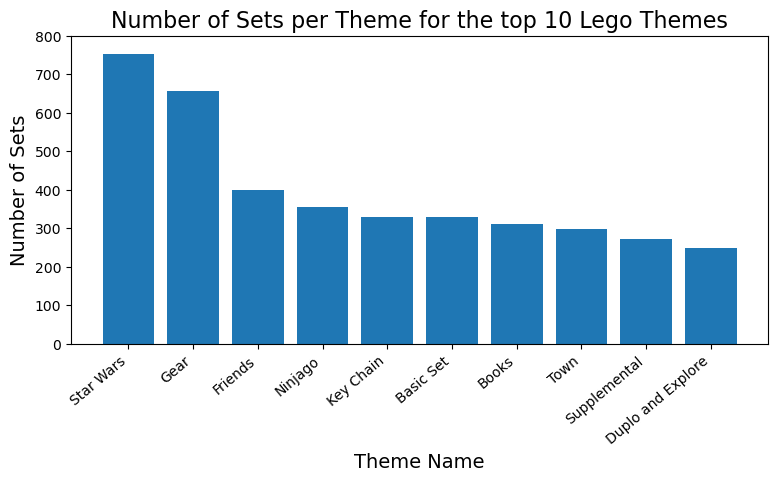

In [46]:
# Data
theme_names = merged_df.name[:10] # x
num_sets_per_theme = merged_df.set_count[:10] # y

# Bar chart
fig, ax = plt.subplots(figsize=(9, 4))

ax.bar(theme_names, num_sets_per_theme)
ax.set_ylim(0, 800)
ax.set_title('Number of Sets per Theme for the top 10 Lego Themes', fontsize=16)
ax.set_xlabel('Theme Name', fontsize=14)
ax.set_ylabel('Number of Sets', fontsize=14)

# # One method for rotating and right-aligning the ticklabels:
# ax.tick_params(axis='x', labelsize=11, labelcolor='C0', labelrotation=label_rot, direction='out')
# plt.xticks(ha='right')

# # The OOP-way of rotating and right-aligning the ticklabels:
for label in ax.get_xticklabels():
    label.set(rotation=40, 
              ha='right')
    
plt.show()

In [47]:
# We have sen that there are more than one theme called "Star Wars". 
# This is probably the case for other themes too. If we group the merged_df 
# by 'name' and aggregate by summing the set_count-s, the result will be a bit different.
ag = merged_df.groupby('name').agg({'set_count': pd.Series.sum})
ag.sort_values(by='set_count', ascending=False, inplace=True)
ag[:10]

,set_count
name,
Star Wars,776
Gear,656
Basic Set,558
Supplemental,535
Technic,453
Friends,415
Ninjago,360
Town,360
Key Chain,329
